In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from ipywidgets import interact, IntSlider, FloatSlider

def data(N, D):
    X = np.random.rand(N, D)
    y = np.random.randint(0, 4, size=N)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Randomly Generated Dataset')
    plt.legend()
    plt.show()





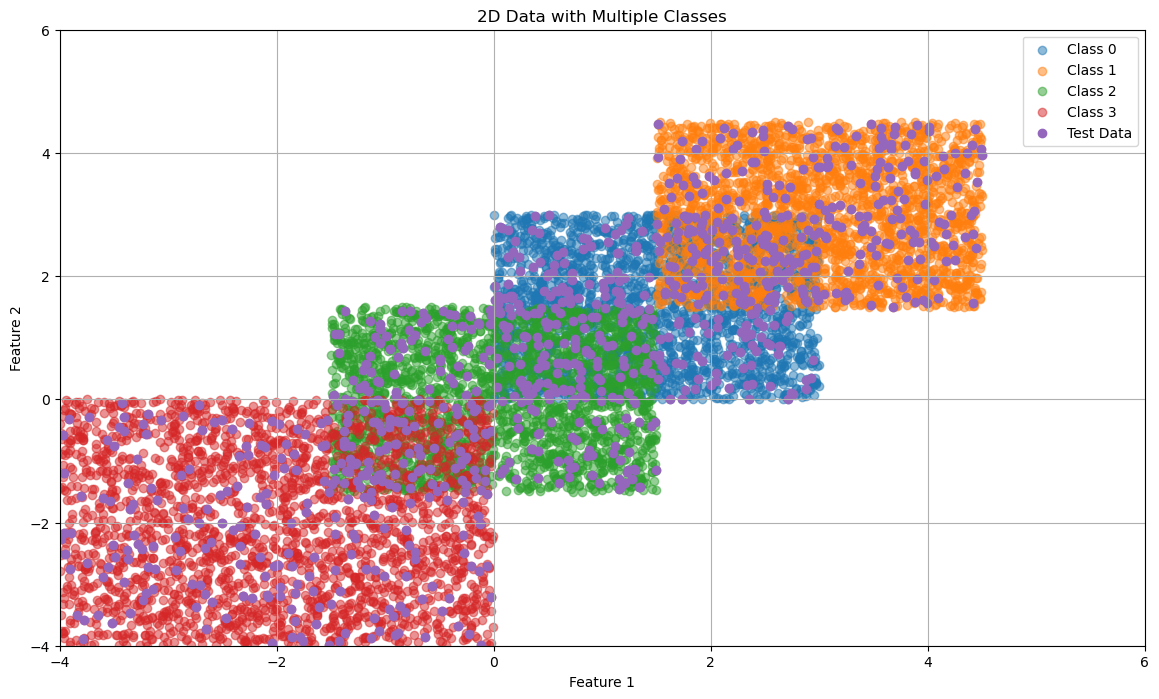

In [20]:
N = 10000  # Number of samples
D = 3    # Number of features
split_ratio = 0.1 # Test Ratio


X, y = data(N,D)
# Add Bias to a class for better cassification
for i, pt in enumerate(X):
    if y[i] == 0:
        X[i] = 3*X[i] 
    elif y[i]==2:
        X[i] = 3*X[i] - 1.5 
    elif y[i]==1:
        X[i] = 3*X[i] + 1.5 
    else:
        X[i] = -4*X[i] 

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
N_train = int(N*(1-split_ratio)) # New Data Size for Training

plt.figure(figsize=(14, 8))
for class_label in np.unique(y):
    class_data = X[y == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1],  label=f'Class {class_label}', alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
X_line = np.linspace(-4, 6, 100)
plt.title('2D Data with Multiple Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-4,6)
plt.ylim(-4,6)
plt.legend()
plt.grid(True)
plt.show()


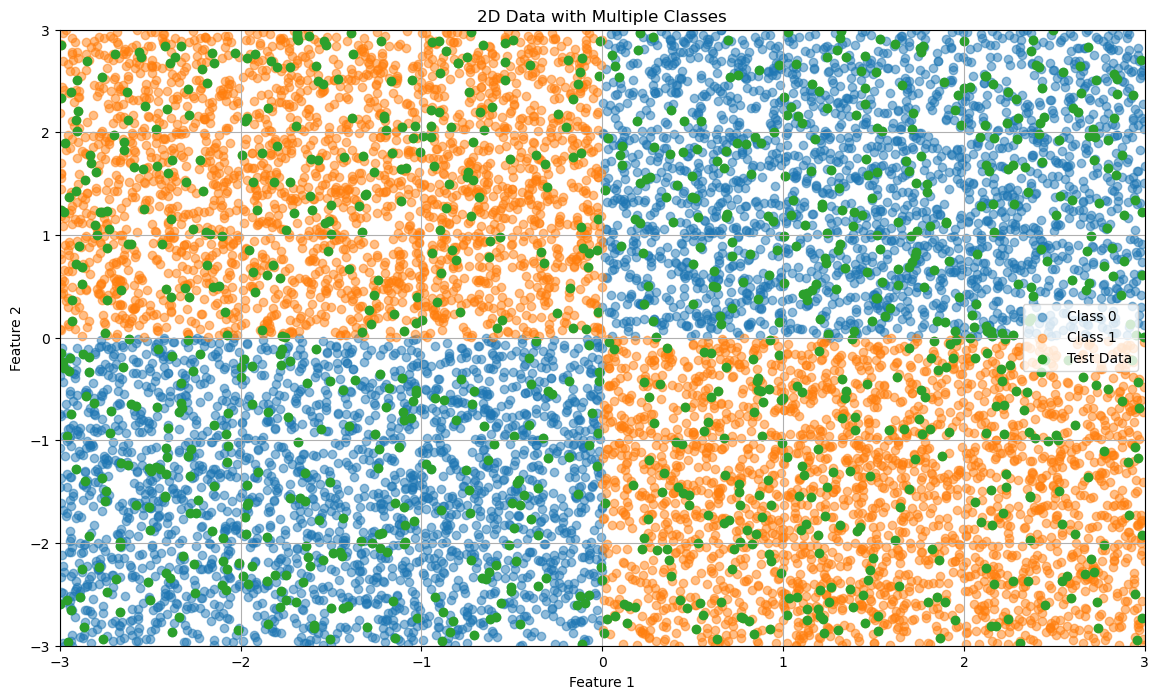

In [21]:
N = 10000  # Number of samples
D = 3    # Number of features
split_ratio = 0.1 # Test Ratio
def generate_xor_data(num_points, Dimensions):
    X = np.random.rand(num_points, 2) * 6 - 3  # Random points in [-1, 1] range
    
    # Assign labels based on XOR pattern
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    
    return X, y

X, y = generate_xor_data(N,D)


X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
N_train = int(N*(1-split_ratio)) # New Data Size for Training

plt.figure(figsize=(14, 8))
for class_label in np.unique(y):
    class_data = X[y == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1],  label=f'Class {class_label}', alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
X_line = np.linspace(-4, 6, 100)
plt.title('2D Data with Multiple Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()
plt.grid(True)
plt.show()


In [22]:
def knn(X_train,y_train,X_test,k):
  bucket=[]
  y_pred=[]
  for j in range(len(X_test)):
    row=[]
    for i in range (len(X_train)):
      row.append(np.linalg.norm(X_test[j,:] - X_train[i,:]))
    bucket.append(row)
  bucket=(np.array(bucket))
  for i in range (len(bucket)):
    data={'1':bucket[i],'2':y_train}
    df=pd.DataFrame(data)
    df=df.sort_values('1')
    y_pred.append(df['2'][:k].mode()[0])
  return y_pred
y_pred=knn(X_train,y_train,X_test,10)



In [23]:
def accuracy(y_test,y_pred):
  s=0
  for i in range(len(y_test)):
    if(y_test[i]==y_pred[i]):
      s+=1
  return (s/len(y_test))
print(accuracy(y_test,y_pred))

0.992


In [24]:

def plot_graph(N, D, k, split_ratio):
    def knn(X_train,y_train,X_test,k):
        bucket=[]
        y_pred=[]
        for j in range(len(X_test)):
            row=[]
            for i in range (len(X_train)):
                row.append(np.linalg.norm(X_test[j,:] - X_train[i,:]))
            bucket.append(row)
        bucket=(np.array(bucket))
        for i in range (len(bucket)):
            data={'1':bucket[i],'2':y_train}
            df=pd.DataFrame(data)
            df=df.sort_values('1')
            y_pred.append(df['2'][:k].mode()[0])
        return y_pred


    split_ratio = split_ratio
    def generate_xor_data(num_points, Dimensions):
        X = np.random.rand(num_points, 2) * 6 - 3  # Random points in [-1, 1] range
        
        # Assign labels based on XOR pattern
        y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
        
        return X, y

    X, y = generate_xor_data(N,D)


    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
    N_train = int(N*(1-split_ratio)) # New Data Size for Training
    start = time.time()
    y_pred = knn(X_train,y_train,X_test,10)
    end = time.time()
    plt.figure(figsize=(14, 8))
    for class_label in np.unique(y):
        class_data = X[y == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1],  label=f'Class {class_label}', alpha = 0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
    X_line = np.linspace(-4, 6, 100)
    plt.title('2D Data with Multiple Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.legend()
    plt.grid(True)
    plt.show()
    

    print("Time: ", (end-start)*1000, "miliseconds")
    print("Accuracy: ", accuracy_score(y_pred, y_test))
    print("Confusion_Matrix: \n", confusion_matrix(y_pred, y_test))

# Define sliders
N_Slider = IntSlider(min=1, max=10000, step=20, value=1000, description='Data Points')
D_Slider = IntSlider(min=1, max=5, step=1, value=2, description='Dimensions')
k_Slider = IntSlider(min=1, max=20, step=1, value=3, description='k')
split_Slider = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='Test Ratio')


# Link sliders to plotting function
interact(plot_graph,N=N_Slider, D=D_Slider, k=k_Slider, split_ratio=split_Slider)



interactive(children=(IntSlider(value=1000, description='Data Points', max=10000, min=1, step=20), IntSlider(v…

<function __main__.plot_graph(N, D, k, split_ratio)>